In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST, CIFAR10

from sklearn import preprocessing, model_selection
from datetime import datetime
import calendar

import os
import gc
import sys

In [2]:
path = 'stock-time-series-20050101-to-20171231/'

In [3]:
file_list = os.listdir(path)

In [4]:
symbols = [csv[:-29] for csv in file_list]

In [5]:
symbols.remove('all_stocks')

In [6]:
symbols.remove('all_stocks')

In [7]:
file_list[:5]

['all_stocks_2017-01-01_to_2018-01-01.csv',
 'CSCO_2006-01-01_to_2018-01-01.csv',
 'PG_2006-01-01_to_2018-01-01.csv',
 'WMT_2006-01-01_to_2018-01-01.csv',
 'UTX_2006-01-01_to_2018-01-01.csv']

In [8]:
def load_symbol(symbol):
    return pd.read_csv(path + symbol + '_2006-01-01_to_2018-01-01.csv')

In [9]:
aapl = load_symbol('AAPL')

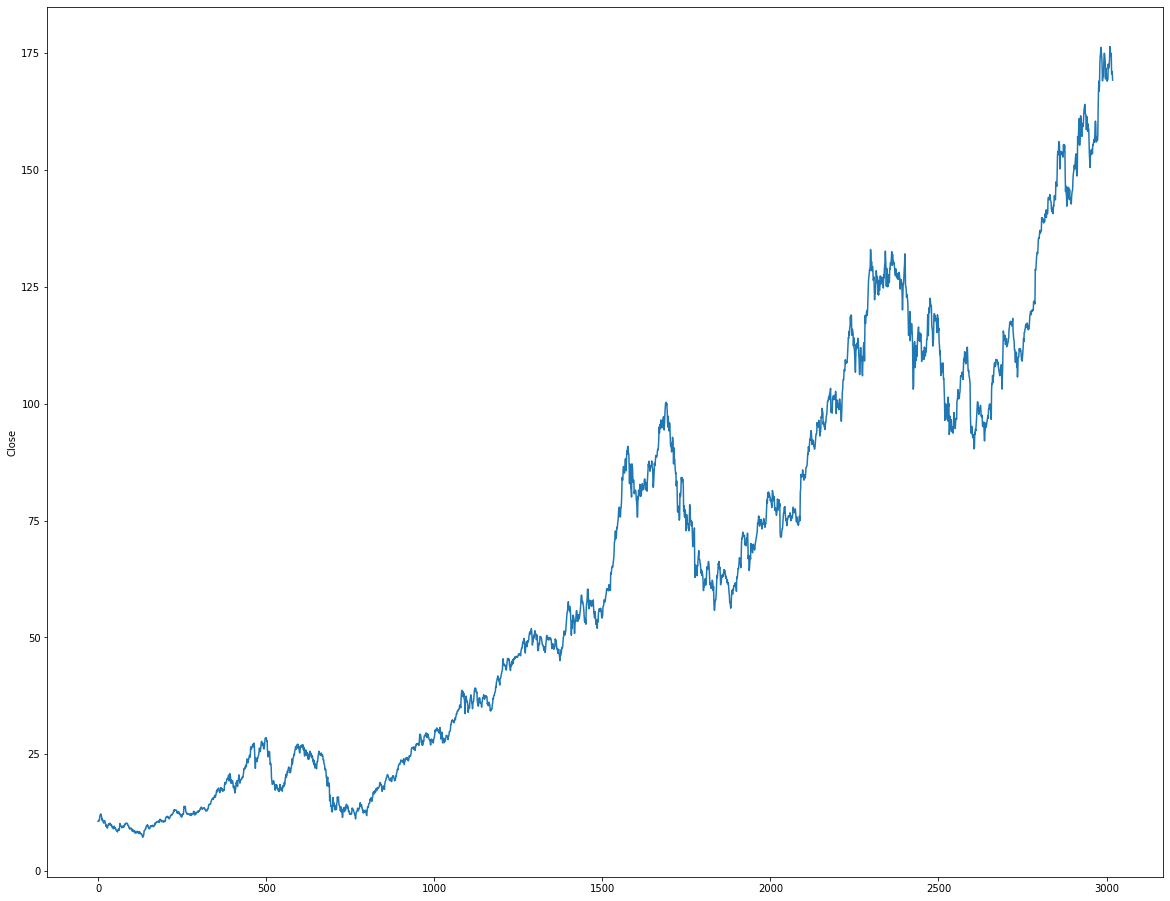

In [10]:
ax = plt.figure(figsize=(20,16))
sns.lineplot(x=range(len(aapl)), y=aapl['Close'])

In [11]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [12]:
aapl.drop('Name', axis=1, inplace=True)

In [29]:
aapl['Date'].head()

0    2006-01-03
1    2006-01-04
2    2006-01-05
3    2006-01-06
4    2006-01-09
Name: Date, dtype: object

In [40]:
def process_dates(df, column='Date', dform='%Y-%m-%d', year=True, month=True, day=True, weekday=True, inplace=False, drop_date=False):
    # Extracts desired features from date
    dates = df[column]
    
    feature_dict = dict( (name,eval(name)) for name in ['year', 'month', 'day', 'weekday'] )
    
    date_dict = {}

    for feature in feature_dict:
        if feature_dict[feature] == True:
            date_dict[feature] = []
    
    for i in range(len(df)):
        date = datetime.strptime(dates[i], dform)
        if year:
            date_dict['year'].append(date.year)
        if month:
            date_dict['month'].append(date.month)
        if day:
            date_dict['day'].append(date.day)
        if weekday:
            date_dict['weekday'].append(date.weekday())
            
    if drop_date:
        df.drop(column, inplace=True, axis=1)
    
    if inplace:
        for key in date_dict:
            df[key] = date_dict[key]
        return None
            
    return date_dict

In [41]:
process_dates(aapl, inplace=True, drop_date=True)

In [42]:
# for key in aapl_dates:
#     print(key, aapl_dates[key][:9])

In [43]:
aapl.head()

,Open,High,Low,Close,Volume,year,month,day,weekday
0,10.34,10.68,10.32,10.68,201853036,2006,1,3,1
1,10.73,10.85,10.64,10.71,155225609,2006,1,4,2
2,10.69,10.70,10.54,10.63,112396081,2006,1,5,3
3,10.75,10.96,10.65,10.90,176139334,2006,1,6,4
4,10.96,11.03,10.82,10.86,168861224,2006,1,9,0


In [56]:
# ax = plt.figure(figsize=(20,16))
# sns.heatmap(aapl.corr())

In [141]:
# aapl.head()

In [64]:
# for col in aapl.columns:
#     sns.distplot(aapl[col])
#     plt.show()

In [45]:
scaler = preprocessing.StandardScaler()
sa = scaler.fit_transform(aapl)

In [48]:
saapl = pd.DataFrame(sa, columns=aapl.columns)

In [52]:
# for col in saapl.columns:
#     sns.distplot(saapl[col])
#     plt.show()

In [69]:
def create_series(df, col, out, inplace=False):
    
    if not in_place:
        df = df.copy()
    
    next_list = []
    for i in range(1, len(df)):
        next_list.append(df.iloc[i][col])
        
    df.drop(len(df) - 1, inplace=True)
    df[out] = next_list
    
    if not inplace:
        return df
    return None

In [70]:
sas = create_series(saapl, 'Close', 'Target')

In [75]:
sas.head()

,Open,High,Low,Close,Volume,year,month,day,weekday,Target
0,-1.220492,-1.218115,-1.214590,-1.212307,0.694305,-1.593657,-1.6203,-1.457731,-0.730916,-1.211633
1,-1.211731,-1.214320,-1.207354,-1.211633,0.236451,-1.593657,-1.6203,-1.343360,-0.016101,-1.213430
2,-1.212630,-1.217668,-1.209616,-1.213430,-0.184110,-1.593657,-1.6203,-1.228989,0.698715,-1.207366
3,-1.211282,-1.211865,-1.207128,-1.207366,0.441811,-1.593657,-1.6203,-1.114618,1.413531,-1.208264
4,-1.206565,-1.210303,-1.203284,-1.208264,0.370344,-1.593657,-1.6203,-0.771504,-1.445732,-1.192769


In [77]:
from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(sas.drop('Target', axis=1), 
#                           sas['Target'], train_size=.3, random_state=101)

In [316]:
split = 2300
y_col = 'Target'

X_train = sas.iloc[:split].drop(y_col, axis=1)
X_test = sas.iloc[split:].drop(y_col, axis=1)
y_train = sas.iloc[:split][y_col]
y_test = sas.iloc[split:][y_col]

In [317]:
X_train = torch.from_numpy(X_train.values.astype(np.float32))
X_test = torch.from_numpy(X_test.values.astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

In [318]:
class lnn(nn.Module):
    def __init__(self, in_dim, l1, l2, l3, l4, out_dim):
        super(lnn, self).__init__()
        self.l1 = nn.Linear(in_dim, l1)
        self.l2 = nn.Linear(l1, l2)
        self.l3 = nn.Linear(l2, l3)
        self.l4 = nn.Linear(l3, l4)
        self.l5 = nn.Linear(l4, out_dim)
        
    def forward(self, x):
        x = F.selu(self.l1(x))
        x = F.selu(self.l2(x))
        x = F.selu(self.l3(x))
        x = F.selu(self.l4(x))
        x = F.selu(self.l5(x))
        return x

In [423]:
learning_rate = .01
num_epochs = 12000
show_num = num_epochs/5

In [424]:
%%time

model = lnn(9, 100, 300, 100, 10, 1)

model = model.cuda()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=.9)

for epoch in range(num_epochs):

    running_loss = 0.0

    if torch.cuda.is_available():
        NX_train = Variable(X_train).cuda()
        Ny_train = Variable(y_train).cuda()
    else:
        NX_train = Variable(X_train)
        Ny_train = Variable(y_train)
        

    out = model(NX_train)
    loss = criterion(out, Ny_train.view(out.size(0), -1))
    
    running_loss += loss.item() * Ny_train.size(0)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    if (epoch + 1) % show_num == 0:
        print('epoch {}'.format(epoch + 1))
        print('*' * 10)
        print('Finish {} epoch, Loss: {:.6f}'.format(
            epoch + 1, running_loss / (len(X_train))))
        
    model.eval()
    eval_loss = 0.

    with torch.no_grad():
        if torch.cuda.is_available():
            NX_test = Variable(X_test).cuda()
            Ny_test = Variable(y_test).cuda()
        else:
            NX_test = Variable(X_test)
            Ny_test = Variable(y_test)
    
    out = model(NX_test)
    loss = criterion(out, Ny_test.view(out.size(0), -1))
    eval_loss += loss.item() * Ny_test.size(0)
    
    if (epoch + 1) % show_num == 0:
        print('Test Loss: {:.6f}'.format(eval_loss / (len(X_test))))
        print('Overfit ratio {:.6f}'.format((eval_loss / (len(X_test)))/
                                            (running_loss / (len(X_train)))))
        print()

epoch 2400
**********
Finish 2400 epoch, Loss: 0.000549
Test Loss: 0.029570
Overfit ratio 53.826675

epoch 4800
**********
Finish 4800 epoch, Loss: 0.000450
Test Loss: 0.026331
Overfit ratio 58.490168

epoch 7200
**********
Finish 7200 epoch, Loss: 0.000398
Test Loss: 0.024572
Overfit ratio 61.744567

epoch 9600
**********
Finish 9600 epoch, Loss: 0.000366
Test Loss: 0.023588
Overfit ratio 64.520882

epoch 12000
**********
Finish 12000 epoch, Loss: 0.000340
Test Loss: 0.022648
Overfit ratio 66.546134

CPU times: user 17.6 s, sys: 433 ms, total: 18.1 s
Wall time: 18.1 s


In [425]:
sclose = saapl['Close'].drop(len(saapl) - 1)
tinput = torch.from_numpy(sas.drop('Target', axis=1).values.astype(np.float32)).cuda()
toutput = model(tinput)
noutput = toutput.detach().cpu().numpy()
loutput = []

for i in range(len(noutput)):
    loutput.append(noutput[i][0])

loutput = pd.Series(loutput)

close = aapl['Close'].drop(len(aapl) - 1)
scaled_temp = saapl.copy()
scaled_temp['Close'] = loutput
unscaled_temp = scaler.inverse_transform(scaled_temp)
unscaled_temp = pd.DataFrame(unscaled_temp, columns=saapl.columns)
unscaled_pred = unscaled_temp['Close']
unscaled_pred.drop(len(unscaled_pred) - 1, inplace=True)

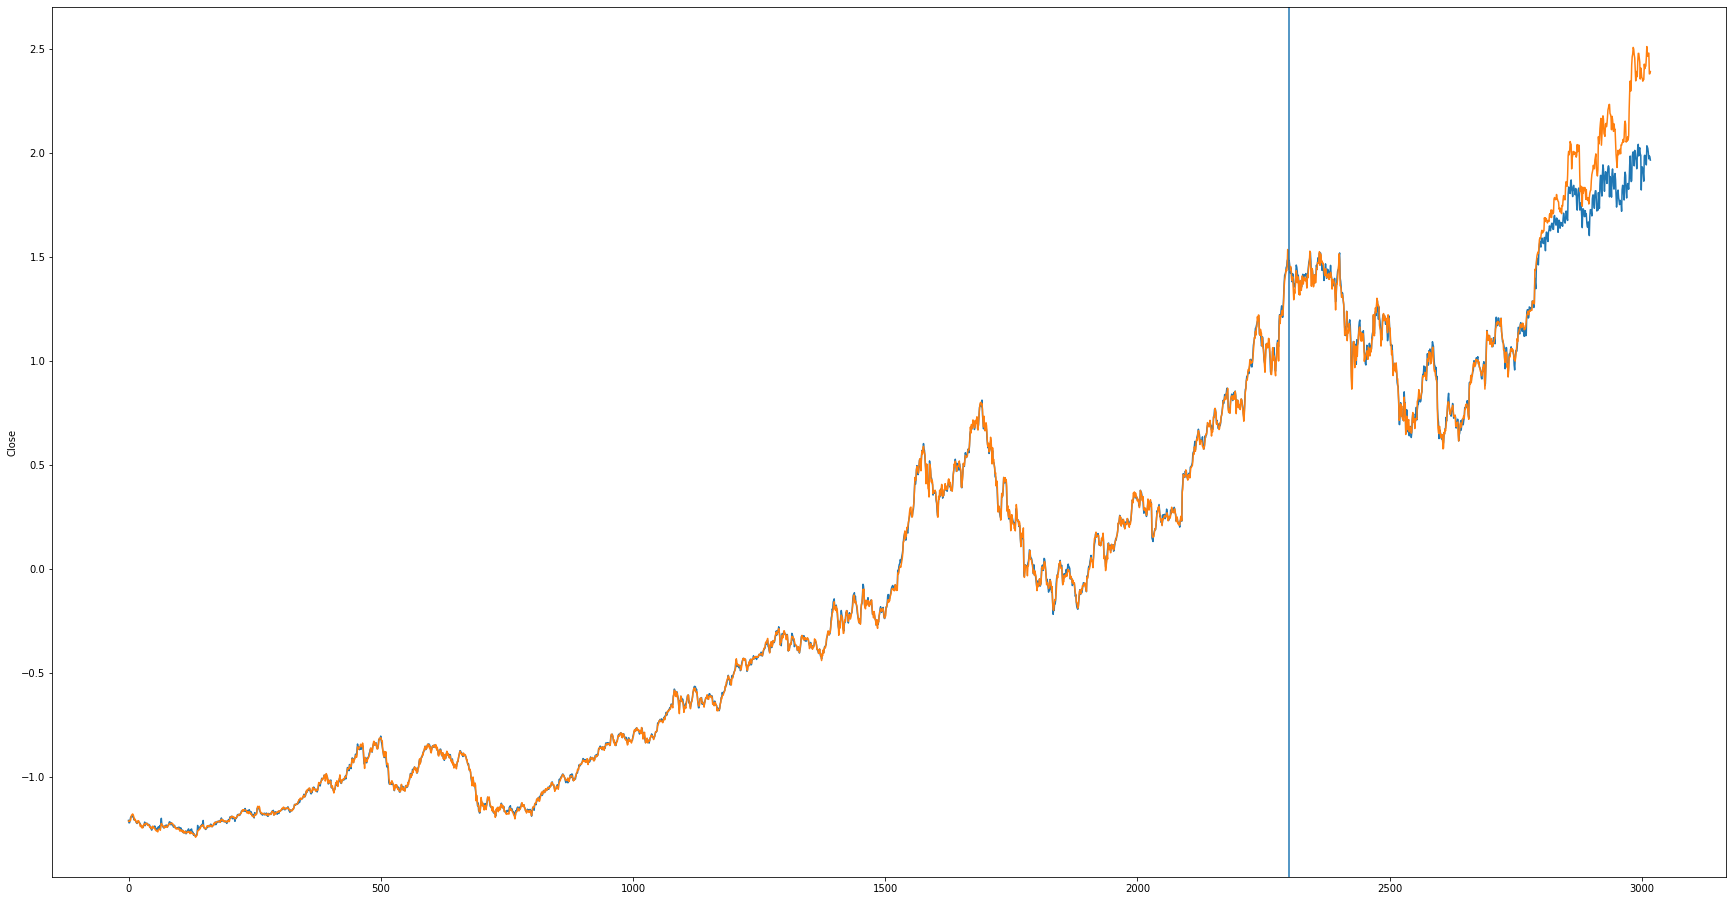

In [528]:
want_all = 1

if want_all:
    segment = len(sclose)
    ax = plt.figure(figsize=(30,16))
    sns.lineplot(x=range(segment), y=loutput[-1 * segment:])
    sns.lineplot(x=range(segment), y=sclose[-1 * segment:])
    plt.axvline(x=split)
else:
    segment = len(sclose) - split
    ax = plt.figure(figsize=(30,16))
    sns.lineplot(x=range(segment), y=loutput[-1 * segment:])
    sns.lineplot(x=range(segment), y=sclose[-1 * segment:])

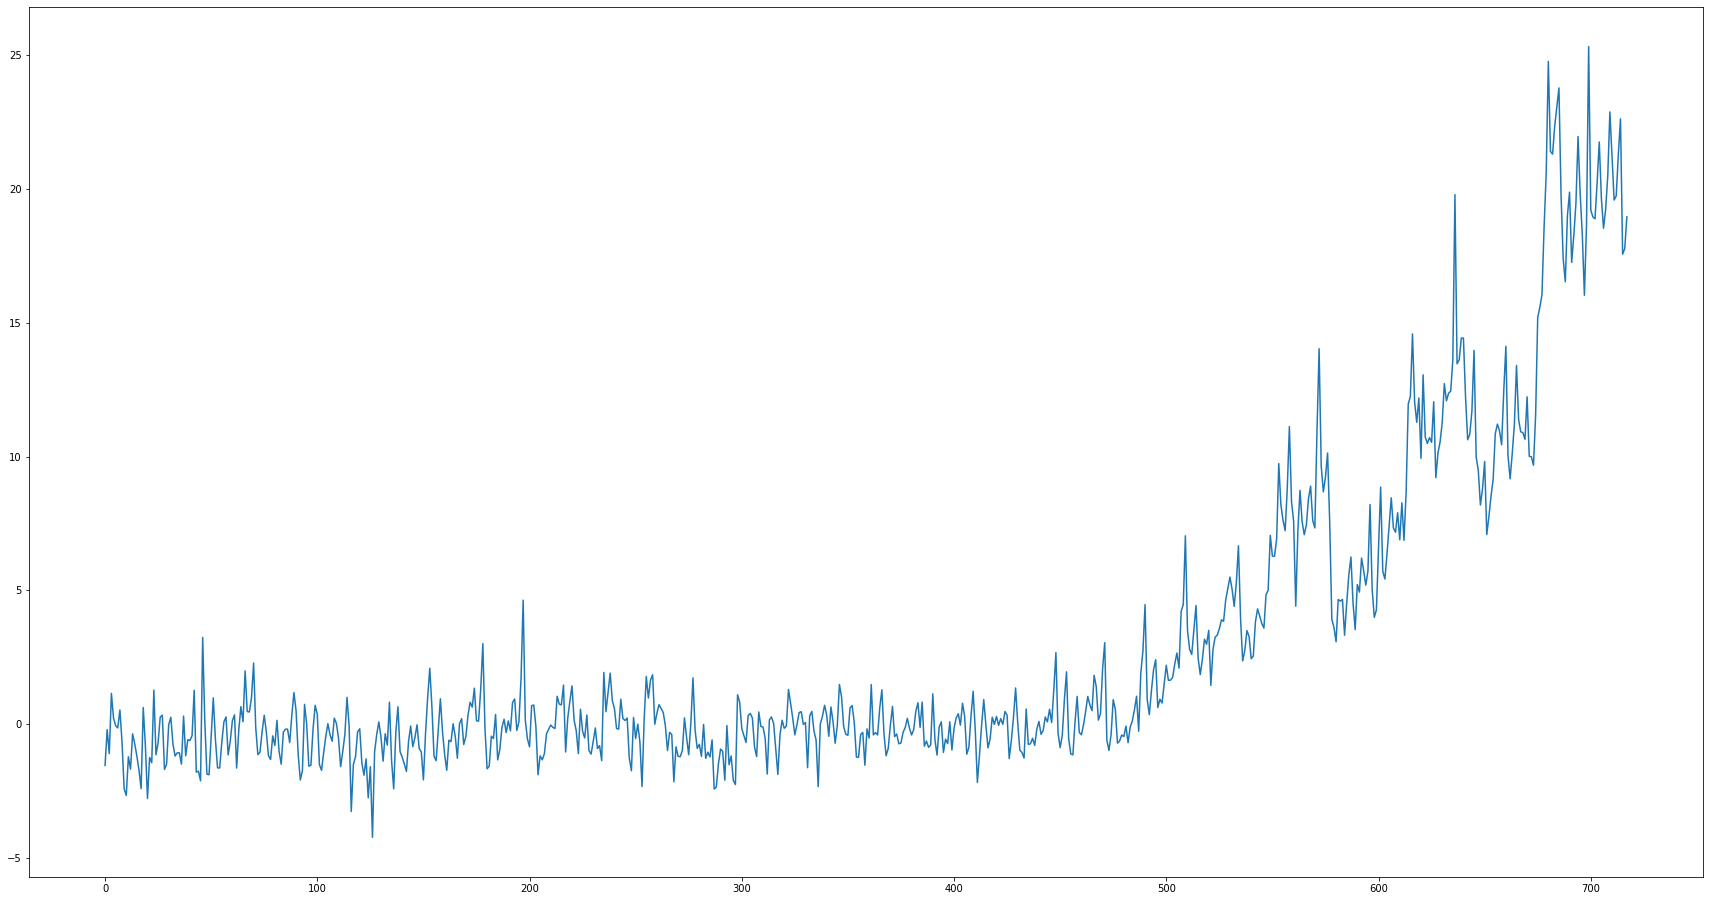

In [427]:
segment = len(sclose) - split
price_resid = (sclose[-1 * segment:] - loutput[-1 * segment:]) * aapl['Close'].std()

ax = plt.figure(figsize=(30,16))
sns.lineplot(x=range(segment), y=price_resid)

In [521]:
good_slice = 400
z = 2.576

std = price_resid.iloc[:good_slice].std()
print('std price:', round(std, 3))
print('99% conf in price:', round(z * (1/(good_slice**(1/2))), 3))
print('99% conf interval:', (round(std - z * (1/good_slice**(1/2)), 3)), ',',  round((std + z * (1/good_slice**(1/2))), 3))

good_part = loutput[split:(split + good_slice)]
real_part = sclose[split:(split + good_slice)]

good_loss = sum((good_part - real_part)**2)/len(good_part)
print('Test loss on good slice:', round(good_loss, 6))
print('Overfit ratio on good slice:', round(good_loss/(running_loss / (len(X_train))), 6))

std price: 1.031
99% conf in price: 0.129
99% conf interval: 0.902 , 1.16
Test loss on good slice: 0.000598
Overfit ratio on good slice: 1.757035


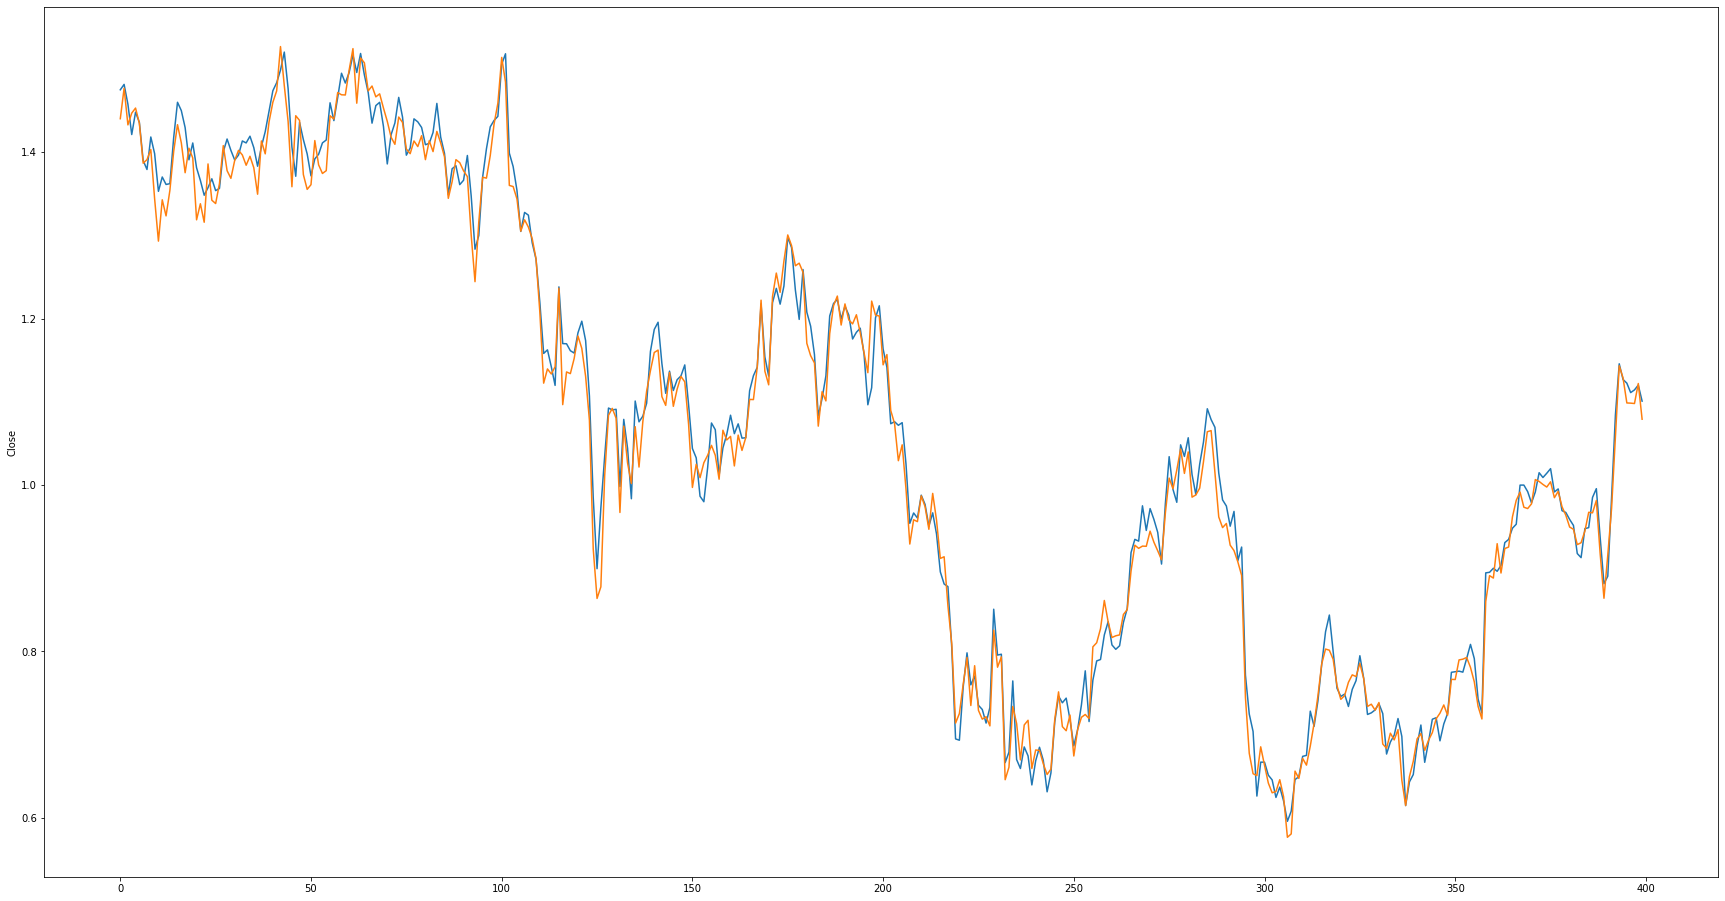

In [522]:
segment = len(sclose) - split
ax = plt.figure(figsize=(30,16))
sns.lineplot(x=range(good_slice), y=loutput[-1 * segment: (-1 * segment) + good_slice])
sns.lineplot(x=range(good_slice), y=sclose[-1 * segment: (-1 * segment) + good_slice])

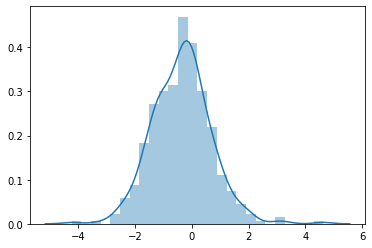

In [523]:
sns.distplot(price_resid.iloc[:good_slice])

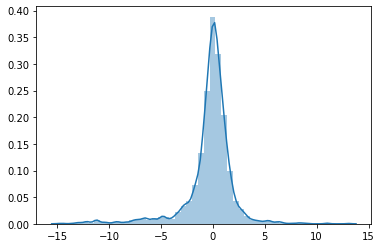

In [524]:
# Compare unscaled_pred and close
percent_off = []

for real_close, pred_close in zip(close, unscaled_pred):
    percent_off.append(((pred_close - real_close)/real_close)*100)
    
percent_off = pd.Series(percent_off)
sns.distplot(percent_off)

In [525]:
print('mean:', percent_off.mean())
print('std:', percent_off.std())

mean: -0.27831371346696016
std: 2.3640166013935406


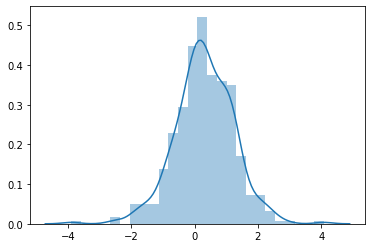

In [526]:
# Compare unscaled_pred and close in in good part
start_of_good = -1 * segment
end_of_good = (-1 * segment) + good_slice

good_percent_off = []

for real_close, pred_close in zip(close[start_of_good:end_of_good], unscaled_pred[start_of_good:end_of_good]):
    good_percent_off.append(((pred_close - real_close)/real_close)*100)
    
good_percent_off = pd.Series(good_percent_off)
sns.distplot(good_percent_off)

In [527]:
print('mean:', good_percent_off.mean())
print('std:', good_percent_off.std())

mean: 0.3123002488690173
std: 0.9253341780891713
